In [1]:
import datetime
import pandas as pd


df = pd.read_csv("/Users/lheyerda/Library/CloudStorage/OneDrive-InstitutPasteurParis/github/juil23_cds_supply_chain/data/avis/gen_df_clean_similarity_labelled.csv")
df.head(1)
df['f_good_value'] = df.apply(lambda row: 1 if row['c_good_value'] == 1 and row['c_bad_value'] == 0 else 0, axis=1)
df['f_bad_value'] = df.apply(lambda row: 1 if row['c_bad_value'] == 1 and row['c_good_value'] == 0 else 0, axis=1)

good_value = df[df.f_good_value ==1]
bad_value = df[df.f_bad_value == 1]
df2 = pd.concat([good_value, bad_value], axis = 0)
df2['n'] = 1
df2 = df2[['n', "date_experience", "c_bad_value", "c_good_value"]]
tab = df2.groupby("date_experience").count().reset_index()
tab.date_experience = pd.to_datetime(tab.date_experience)


In [84]:
#tab.to_csv('plot_value.csv')

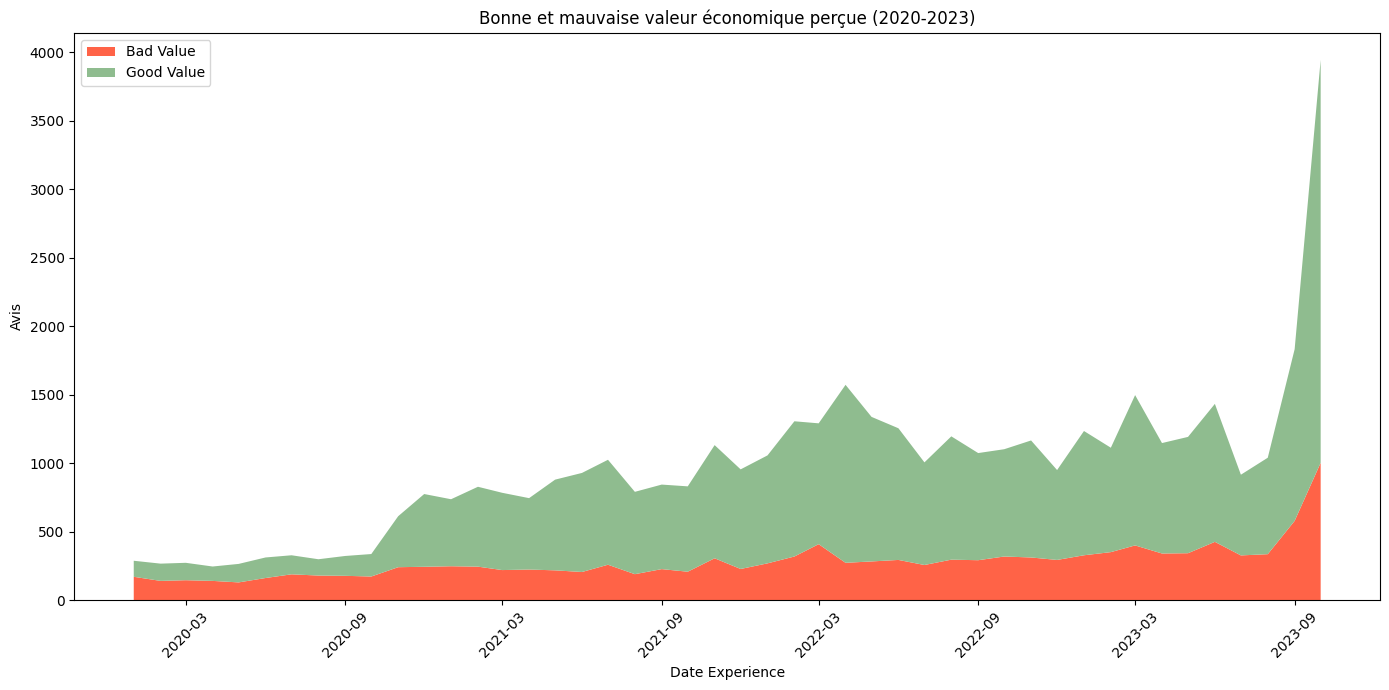

In [101]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

tab2 = pd.read_csv('plot_value.csv')

tab2['date_experience'] = pd.to_datetime(tab2['date_experience'], errors='coerce')
tab2 = tab2.dropna(subset=['date_experience'])

tab2 = tab2[tab2['date_experience'] >= '2020-01-01']

# Plot
plt.figure(figsize=(14, 7))
plt.stackplot(tab2['date_experience'], tab2['f_bad_value'], tab2['f_good_value'], labels=['Bad Value', 'Good Value'], colors=['tomato', 'darkseagreen'])

# mod pour le format des dates sur x 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Date Experience')
plt.ylabel('Avis')
plt.title('Bonne et mauvaise valeur économique perçue (2020-2023)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [112]:
df['perte'] = df['text_total'].apply(lambda text: 1 if 'perte' in str(text) else 0)
print(df[['text_total', 'perte']].head())
tab3 = df.groupby("date_experience").count().reset_index()
tab3

                                          text_total  perte
0  "Orgueil gestionnaire. Ça reste une mauvaise e...      0
1  "Mauvaise expérience en agence physique et en ...      0
2  "Chère agence ,. Chère agence ,je dois bous di...      0
3  "Mépris ou incompétence ou les 2. RV pris à l'...      0
4  "Pas d'imprimé prévu pour transferts de compte...      0


,date_experience,etoiles,n_avis,date_avis,Société,text_total,text_clean_sentences_neg,text_clean_sentences_pos,text_stop,text_clean_sentences_neg_stop,text_clean_sentences_pos_stop,c_bad_com,c_bad_efficacy,c_good_efficacy,c_good_com,c_good_value,c_bad_value,f_good_value,f_bad_value,perte
0,2011-03-08,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2011-03-16,2,2,2,2,2,0,2,2,0,2,2,2,2,2,2,2,2,2,2
2,2011-04-12,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1
3,2011-04-13,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1
4,2011-04-16,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,2023-10-16,775,775,775,775,775,413,641,775,413,641,775,775,775,775,775,775,775,775,775
2997,2023-10-17,700,700,700,700,700,330,589,700,330,589,700,700,700,700,700,700,700,700,700
2998,2023-10-18,1015,1015,1015,1015,1015,651,734,1015,651,734,1015,1015,1015,1015,1015,1015,1015,1015,1015
2999,2023-10-19,867,867,867,867,867,363,822,867,363,822,867,867,867,867,867,867,867,867,867


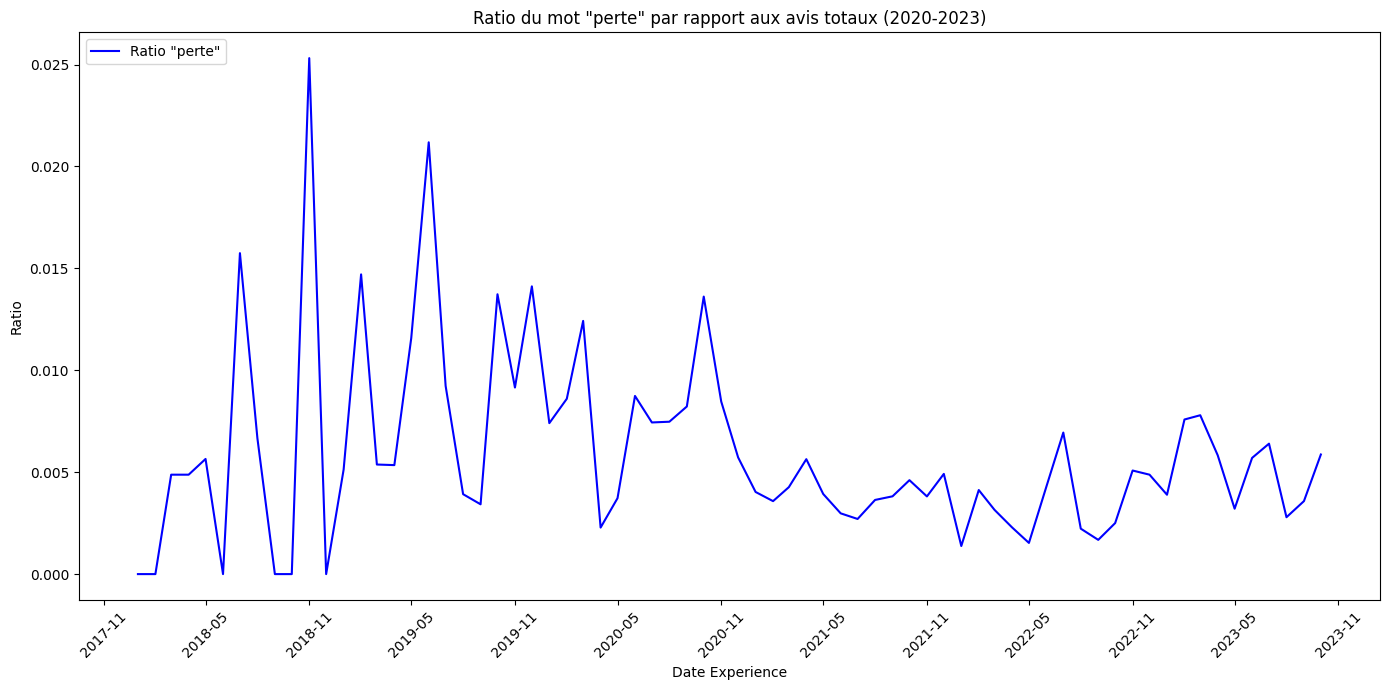

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Créer une nouvelle colonne 'perte' qui est 1 si le mot "perte" est dans le texte, sinon 0
df['perte'] = df['text_total'].apply(lambda text: 1 if 'perte' in str(text) else 0)

# Convertir date_experience en datetime
df['date_experience'] = pd.to_datetime(df['date_experience'])
df_filtered = df[df['date_experience'] >= '2018-01-01']

# Grouper par mois et compter les occurrences de 'perte' et le nombre total d'avis
tab = df_filtered.groupby(df_filtered['date_experience'].dt.to_period('M')).agg({
    'perte': 'sum',
    'text_total': 'count'  # Nombre total d'avis
}).reset_index()


tab['date_experience'] = tab['date_experience'].dt.to_timestamp()
tab['ratio_perte'] = tab['perte'] / tab['text_total']

#plot
plt.figure(figsize=(14, 7))
plt.plot(tab['date_experience'], tab['ratio_perte'], label='Ratio "perte"', color='blue')


plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Date Experience')
plt.ylabel('Ratio')
plt.title('Ratio du mot "perte" par rapport aux avis totaux (2020-2023)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()